<span>
<b>Authors:</b> 
<a href="http://------">Ornela Danushi </a>
<a href="http://------">Gerlando Gramaglia </a>
<a href="http://------">Domenico Profumo </a><br/>
<b>Python version:</b>  3.x<br/>
</span>

# Data Understanding & Preparation on Tennis Matches dataset 
Explore the dataset by studying the data quality, their distribution among several different features and the correlations.

The **central component** of the data science toolkit is **Pandas library** is a and it is used in conjunction with other libraries in that collection. Pandas is built on top of the **NumPy package**, meaning a lot of the structure of NumPy is used or replicated in Pandas. Data in pandas is often used to feed statistical analysis in **SciPy**, plotting functions from **Matplotlib**, and machine learning algorithms in Scikit-learn.


In [1]:
import pandas as pd
import math
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sn

from scipy.stats.stats import pearsonr

In [2]:
#df.dtypes #return the type of each attribute but is already included in the df.info() called later

## Types of Attributes and basic checks

## Data Quality with reference to Syntactic Accuracy

Check the data integrity, that is whether there are any empty cells or corrupted data. We will use for this purpose the Pandas function info(), which checks if there is any null value in any column. This function also checks data type for each column, as well as number of each data types and number of observations (rows).
Moreover we check if each attribute is syntactically correct according to the specifications

In [3]:
df = pd.read_csv('dataset/matches_with_gender.csv', index_col = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186128 entries, 0 to 186127
Data columns (total 51 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tourney_id          186073 non-null  object 
 1   tourney_name        186103 non-null  object 
 2   surface             185940 non-null  object 
 3   draw_size           186099 non-null  float64
 4   tourney_level       186099 non-null  object 
 5   tourney_date        186100 non-null  float64
 6   match_num           186101 non-null  float64
 7   winner_id           186073 non-null  float64
 8   winner_entry        25827 non-null   object 
 9   winner_name         186101 non-null  object 
 10  winner_hand         186082 non-null  object 
 11  winner_ht           49341 non-null   float64
 12  winner_ioc          186099 non-null  object 
 13  winner_age          183275 non-null  float64
 14  loser_id            186100 non-null  float64
 15  loser_entry         44154 non-null

## Classification of Data Domain

### Tourney

   - *tourney_id* - ***object*** 
   - *tourney_name* - ***object*** 
   - *tourney_level* - ***object***
   - *tourney_spectators* - ***float64*** 
   - *tourney_revenue* - ***float64***
    
### Matches
 
   - *match_num*- ***float64***
   - *surface* - ***object***
   - *draw_size* - ***float64*** => ***int64*** 
   - *tourney_date* - ***float64*** => ***Datetime64***
   - *minutes* - ***float64*** 
   - *score* - ***object***
   - *round* - ***object*** 
   - *best_of* - ***float64***

### Players
 
   - *winner_id*- ***float64***                  ||       *loser_id*- ***float64*** 
   - *winner_name* - ***object***                ||       *loser_name* - ***object***
   - *winner_ioc* - ***object***                 ||       *loser_ioc* - ***object*** 
   - *winner_ht*- ***float64***                  ||       *loser_ht*- ***float64*** 
   - *winner_age*- ***float64***   => ***int***  ||       *loser_age*- ***float64***  => ***int***  
   - *winner_hand* - ***object***                ||       *loser_hand* - ***object***
   - *winner_entry* - ***object***               ||       *loser_entry* - ***object***
   - *winner_rank* - ***float64***               ||       *loser_rank* - ***float64***
   - *winner_rank_points* - ***float64***        ||       *loser_rank_points* - ***float64***  
   - *w_ace* - ***float64*** => ***int***        ||       *l_ace* - ***float64***  => ***int***  
   - *w_df* - ***float64*** => ***int***         ||       *l_df* - ***float64***    => ***int***  
   - *w_svpt* - ***float64***                    ||       *l_svpt* - ***float64*** 
   - *w_1stIn* - ***float64***                   ||       *l_1stIn* - ***float64***
   - *w_1stWon* - ***float64***                  ||       *l_1stWon* - ***float64***
   - *w_2ndWon* - ***float64***                  ||       *l_2ndWon* - ***float64***
   - *w_SvGms* - ***float64***                   ||       *l_SvGms* - ***float64***
   - *w_bpSaved* - ***float64***                 ||       *l_bpSaved* - ***float64***
   - *w_bpFaced* - ***float64***                 ||       *l_bpFaced* - ***float64*** 
   - *winner_gender* - ***object***              ||       *loser_gender* - ***object*** 
 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186128 entries, 0 to 186127
Data columns (total 51 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tourney_id          186073 non-null  object 
 1   tourney_name        186103 non-null  object 
 2   surface             185940 non-null  object 
 3   draw_size           186099 non-null  float64
 4   tourney_level       186099 non-null  object 
 5   tourney_date        186100 non-null  float64
 6   match_num           186101 non-null  float64
 7   winner_id           186073 non-null  float64
 8   winner_entry        25827 non-null   object 
 9   winner_name         186101 non-null  object 
 10  winner_hand         186082 non-null  object 
 11  winner_ht           49341 non-null   float64
 12  winner_ioc          186099 non-null  object 
 13  winner_age          183275 non-null  float64
 14  loser_id            186100 non-null  float64
 15  loser_entry         44154 non-null

# Data Semantics

In this part we analyze each attributes type, conversion type, relationship, NaN and negative values check

## Tourney


### draw_size

number of players in the draw, often rounded up to the nearest power of 2. (For instance, a tournament with 28 players may be shown as 32.)

Analysis: since all powers of 2 are integers the idea is to convert to the 'int' format. Dafter converting them into integers we used a logarithmic function to understand the right exponent that would allow us to obtain the numbers with the nearest power of 2 for example 15-> 16 23-> 32 etc.

In [5]:
print("description of draw_size:" + "\n"+str(df.draw_size.describe()))
print("null_values: "+ str(df.draw_size.isnull().sum())) #29
print("unique value (before conversion):" + "\n"+str(df.draw_size.unique()))  


#[ 32. 128.  64.   8.   4.  29.  16.  30.  31.  20.  28.  23.  25.  27.
#  26.  19.  10.  15.  24.  18.  12.   2.  54.  48.  nan]


log= np.log2(df.draw_size)

for i in range(0, len(log)):
    dec, inter = math.modf(log[i])
    if dec == 0:
        log[i] = inter
    else:
        log[i] = inter + 1
df.draw_size = pow(2, log)
print("unique value (after conversion):" + "\n"+str(df.draw_size.unique()))  

# [ 32. 128.  64.   8.   4.  16.   2.  nan]

description of draw_size:
count    186099.000000
mean         41.037276
std          25.349017
min           2.000000
25%          32.000000
50%          32.000000
75%          32.000000
max         128.000000
Name: draw_size, dtype: float64
null_values: 29
unique value (before conversion):
[ 32. 128.  64.   8.   4.  29.  16.  30.  31.  20.  28.  23.  25.  27.
  26.  19.  10.  15.  24.  18.  12.   2.  54.  48.  nan]
unique value (after conversion):
[ 32. 128.  64.   8.   4.  16.   2.  nan]


## Drop Duplicates

In [6]:
#df[df.duplicated()].info()

df.drop_duplicates(inplace=True)
 
# length after removing duplicates
length3=len(df)
print("post drop duplicates lenght: ", length3)

post drop duplicates lenght:  185819


### tourney_id

has to be unique and the first four characters are always the year while the remaining part is random

Analysis:

Split the value of the attribute in 2 parts, the first with 4 characters and the second with the remaing characters.
For both the parts build a set inserting each different year and id. 
Count how many wrong years are inserted through a NaN value. 
To detect the wrong ids is more difficult since they are random and don't follow a known a structure.
We can only conclude that the wrong id elements are those deriving from the wrong years.

NOTE: The decision to take is to delete or edit all these attributes.

In [7]:
print("description of tourney_id:" + "\n"+str(df['tourney_id'].describe()))

print("null_values: "+ str(df['tourney_id'].isnull().sum())) #55
tourney_year= df['tourney_id'].str[:4]
tourney_id= df['tourney_id'].str[5:]

print("Present years: "+ str(tourney_year.unique())) #['2019' '2018' '2017' '2016' '2020' '2021' nan]


description of tourney_id:
count       185764
unique        4853
top       2016-560
freq           478
Name: tourney_id, dtype: object
null_values: 55
Present years: ['2019' '2018' '2017' '2016' '2020' '2021' nan]


### tourney_name
is the name of the tourney

Analysis: there are not many null values, the unique names turn out to be 2488, which makes us think that in total we have 2488 different torneys but first we need to check the correctness of the names. For each tournament I can count the number of different matches that have taken place and save them in tourney_match_dim

In [8]:
print("description of tourney_name:" + "\n"+str(df.tourney_name.describe()))
print("null_values: "+ str(df.tourney_name.isnull().sum())) #25

tourney_match_dim=df.groupby(df.tourney_name,as_index=False).size()
print(tourney_match_dim)

description of tourney_name:
count          185794
unique           2488
top       W15 Antalya
freq             4634
Name: tourney_name, dtype: object
null_values: 25
             tourney_name  size
0        's Hertogenbosch    97
1     ATP Next Gen Finals    16
2               Abu Dhabi    87
3                Acapulco   522
4                Adelaide   128
...                   ...   ...
2483          Zhuhai $50K    31
2484          Zhuhai $60K    62
2485            Zhuhai CH   220
2486      s Hertogenbosch   156
2487      s-Hertogenbosch    52

[2488 rows x 2 columns]


### tourney_level
they are split for men and women.

○ For men: 'G' = Grand Slams, 'M' = Masters 1000s, 'A' = other tour-level
events, 'C' = Challengers, 'S' = Satellites/ITFs, 'F' = Tour finals and other
season-ending events, and 'D' = Davis Cup. F

○ For women, there are several additional tourney_level codes, including 'P' =
Premier, 'PM' = Premier Mandatory, and 'I' = International. The various levels
of ITFs are given by the prize money (in thousands), such as '15' = ITF
$15,000. Other codes, such as 'T1' for Tier I (and so on) are used for older
WTA tournament designations. 'D' is used for the Federation/Fed/Billie Jean
King Cup, and also for the Wightman Cup and Bonne Bell Cup.

○ There is also some competition which can be for both men and women: 'E' =
exhibition (events not sanctioned by the tour, though the definitions can be
ambiguous), 'J' = juniors, and 'T' = team tennis, which does yet appear
anywhere in the dataset but will at some point.


Analisi: We have a few null values that we can replace by analyzing the type of tournament and the gender of the opponent. We can also use the ranges of values to find out information about the player's gender since there are few unique names and they all belong to specific ranges. We do a scan through for identify all levels of women as it is the only category that contains values that others do not have

In [9]:
print("description of tourney_level:" + "\n"+str(df.tourney_level.describe()))
print("null_values: "+ str(df.tourney_level.isnull().sum())) #29
print("unique value:" + "\n"+str(df.tourney_level.unique())) 

#['A' 'P' 'G' 'I' 'M' 'PM' 'F' 'D' 'C' '15' '25' '60' '100' '80' '10' '50' '75' 'O' 'W' nan]

men_levels=['G','M','A','C','S','F','D','E','J','T']
women_levels=['E','J','T','P','PM','I','ITF','WTA','D']

gender=[] #['M','W','-']

test=df.tourney_level
iswomen=0
ismen=0
unknown=0

for i in test:
    if(i=='P' or i=='PM' or i=='I' or i=='ITF' or i=='WTA'):
        iswomen +=1
    elif(i=='G' or i=='M' or i=='A' or i=='C' or i=='S' or i=='F'):
        ismen +=1
    else:
        unknown +=1

print("iswomen: " + str(iswomen))
print("ismen: " + str(ismen))
print("unknown: " + str(unknown))

description of tourney_level:
count     185790
unique        19
top           15
freq       45807
Name: tourney_level, dtype: object
null_values: 29
unique value:
['A' 'P' 'G' 'I' 'M' 'PM' 'F' 'D' 'C' '15' '25' '60' '100' '80' '10' '50'
 '75' 'O' 'W' nan]
iswomen: 15874
ismen: 66303
unknown: 103642


### tourney_spectators     tourney_revenue

Number of spectators in the tournament and total revenue.

Analisi: we have null values that we could exclude given that they are few, furthermore an analysis could be to evaluate the revenues based on the type of tournament and proportion the number of spectators with the gain obtained to understand the average cost of a match (useful for statistical purpose).

In [10]:
print("\ndescription of:" + "\n"+str(df[['tourney_spectators', 'tourney_revenue']].describe()))
print("null_values:\t       "+ str(df.tourney_spectators.isnull().sum()) + "\t\t"
      + str(df.tourney_revenue.isnull().sum())) #27 | 26

df['tourney_spectators'] = round(df['tourney_spectators'], 0) 


description of:
       tourney_spectators  tourney_revenue
count       185792.000000     1.857930e+05
mean          4109.623466     8.228407e+05
std           2708.911943     6.012727e+05
min             91.000000     1.786574e+04
25%           2836.000000     5.473662e+05
50%           3340.000000     6.632303e+05
75%           4008.000000     8.342778e+05
max          18086.000000     5.002794e+06
null_values:	       27		26


## Matches

### match_num

a match-specific identifier. Often starting from 1, sometimes counting down from 300, and sometimes arbitrary.

Analysis: we have few null values, the number of matches must match with the number of tournament values

In [11]:
print("description of match_num:" + "\n"+str(df.match_num.describe()))
print("null_values: "+ str(df.match_num.isnull().sum())) #27

match_dim=df.groupby(['match_num']).size()
print(match_dim)

description of match_num:
count    185792.000000
mean        160.481038
std         289.544275
min           1.000000
25%          17.000000
50%         130.000000
75%         272.000000
max        8312.000000
Name: match_num, dtype: float64
null_values: 27
match_num
1.0       3530
2.0       3532
3.0       2726
4.0       2955
5.0       2802
          ... 
8308.0       1
8309.0       1
8310.0       1
8311.0       1
8312.0       1
Length: 929, dtype: int64


### surface
kind of surface for the match

Analysis: the surfaces are always of four types 'Hard' 'Clay' 'Grass' 'Carpet', there are 188 null values

In [12]:
print("description of surface:" + "\n"+str(df.surface.describe()))
print("null_values: "+ str(df.surface.isnull().sum())) #188
print("unique value:" + "\n"+str(df.surface.unique()))  #['Hard' 'Clay' 'Grass' 'Carpet' nan]

description of surface:
count     185631
unique         4
top         Hard
freq       94965
Name: surface, dtype: object
null_values: 188
unique value:
['Hard' 'Clay' 'Grass' 'Carpet' nan]


### tourney_date

tourney_date: eight digits, YYYYMMDD, usually the Monday of the tournament week.

Analysis:
We convert type of tourney_date in Datetime64. An analysis could be to group each tournament with the matches for the dates associated with it in order to be able to understand the performance of each player over time.

In [13]:
df.tourney_date.describe()
print("null_values: "+ str(df.tourney_date.isnull().sum())) #28

df['tourney_date'] = pd.to_datetime(df['tourney_date'], format='%Y%m%d')

df.tourney_date.head()

null_values: 28


0   2018-12-31
1   2018-12-31
2   2018-12-31
3   2018-12-31
4   2018-12-31
Name: tourney_date, dtype: datetime64[ns]

### minutes 

match length, where available

Analysis: The minutes are of type float, in our opinion it is better to leave them in this format without further converting them to facilitate the statistical control of the data. From the description we can see the presence of many null values and the presence of some outliers to manage.

In [14]:
print("description of draw_size:" + "\n"+str(df.minutes.describe()))
print("null_values: "+ str(df.minutes.isnull().sum())) #104454


description of draw_size:
count    81358.000000
mean        97.692593
std         41.514565
min          0.000000
25%         72.000000
50%         91.000000
75%        119.000000
max       4756.000000
Name: minutes, dtype: float64
null_values: 104461


### Score

Represents the score of each match

Analysis: We have many unique values so it makes us think of many different scores between the various games, we have 199 games of which we do not know the relative scores obtained.

The score could be related to other attributes such as minutes or best_of (which we will see later)

In [15]:
print("description of score:" + "\n"+str(df.score.describe()))
print("null_values: "+ str(df.score.isnull().sum())) #187

description of score:
count      185626
unique       9705
top       6-3 6-4
freq         5367
Name: score, dtype: object
null_values: 193


### Round


In [16]:
print("description of best_of:" + "\n"+str(df['round'].describe()))
print("null_values: "+ str(df['round'].isnull().sum())) #30
print("unique value:" + "\n"+str(df['round'].unique())) 
# ['F' 'SF' 'QF' 'R16' 'R32' 'Q1' 'Q2' 'Q3' 'R64' 'R128' 'RR' 'BR' nan]


description of best_of:
count     185789
unique        12
top          R32
freq       63069
Name: round, dtype: object
null_values: 30
unique value:
['F' 'SF' 'QF' 'R16' 'R32' 'Q1' 'Q2' 'Q3' 'R64' 'R128' 'RR' 'BR' nan]


### best_of

'3' or '5', indicating the number of set for this match

Analysis: the values seem to enter the specified range because they are all 3-5 with the presence of some null values (29).

In [17]:
print("description of best_of:" + "\n"+str(df.best_of.describe()))
print("null_values: "+ str(df.best_of.isnull().sum())) #29
print("unique value:" + "\n"+str(df.best_of.unique())) # [ 3.  5. nan]


description of best_of:
count    185790.000000
mean          3.034157
std           0.259128
min           3.000000
25%           3.000000
50%           3.000000
75%           3.000000
max           5.000000
Name: best_of, dtype: float64
null_values: 29
unique value:
[ 3.  5. nan]


## Players

### winner_id and loser_id

the player_id used in this repo for the winner of the match.

Analysis: We could group each player's id with their name in order to have the player-id association in the player list. Through the groupby we can see only 13 different values for name-id (possible wrong values)

In [18]:
print("\ndescription of:" + "\n"+str(df[['winner_id', 'loser_id']].describe()))
print("null_values: \t  "+ str(df.winner_id.isnull().sum()) + "\t\t "
      + str(df.loser_id.isnull().sum())) #55 | 28 

print(df.groupby(['winner_id']).winner_name.nunique().value_counts())

# df.groupby(['winner_id']).winner_name.nunique() 


description of:
           winner_id       loser_id
count  185764.000000  185791.000000
mean   180105.888068  181617.536258
std     46571.821798   46643.290091
min    100644.000000  100644.000000
25%    122330.000000  124079.000000
50%    203526.000000  205815.000000
75%    214152.000000  214818.000000
max    245099.000000  245099.000000
null_values: 	  55		 28
1    6163
2      13
Name: winner_name, dtype: int64


### winner_name and loser_name

name of player that win 

Analysis: we already looked at these values when we did the Data Integration part so at the moment it only remains to handle the null problem

In [19]:
print("\ndescription of:" + "\n"+str(df[['winner_name', 'loser_name']].describe()))
print("null_values: \t    "+ str(df.winner_name.isnull().sum()) + "\t\t   "
      + str(df.loser_name.isnull().sum())) #27 | 31 



description of:
           winner_name     loser_name
count           185792         185788
unique            6180          10060
top     Novak Djokovic  Federico Gaio
freq               289            180
null_values: 	    27		   31


### Winner and loser ioc 

three-character country code

Analysis: each winner has his own country of reference, we could group them all by participants and understand well all the participants of the tournament of a particular country. The nulls are few so if we want we can make a prediction by checking the name of the participant with the previous scenarios

In [20]:
print("\ndescription of:" + "\n"+str(df[['winner_ioc', 'loser_ioc']].describe()))
print("null_values:    "+ str(df.winner_ioc.isnull().sum()) + "\t   "
      + str(df.loser_ioc.isnull().sum())) #29 | 26 

nation=np.concatenate((df.winner_ioc.unique(), df.loser_ioc.unique()),0)
country = pd.DataFrame(nation)
country = country.drop_duplicates()

print("\ndifferent county names:" + "\n" + str(country.describe()))


description of:
       winner_ioc loser_ioc
count      185790    185793
unique        124       154
top           USA       USA
freq        16394     16649
null_values:    29	   26

different county names:
          0
count   154
unique  154
top     TUR
freq      1


### winner and loser ht

height in centimetres, where available

Analysis: we have many null values, in this case we could go to analyze the name of the winner and see the nationality associated previously and then have the null values replaced. Since the height is an integer we could convert it to integers but right now we leave it in float

In [21]:
print("\ndescription of:" + "\n"+str(df[['winner_ht', 'loser_ht']].describe()))
print("null_values:    "+ str(df.winner_ht.isnull().sum()) + "\t   "
      + str(df.loser_ht.isnull().sum())) #136253 | 147206 

#df['winner_ht']=df['winner_ht'].fillna(0).astype(np.int64)

#print("description of winner_ht:" + "\n"+str(df['winner_ht'].describe()))


description of:
          winner_ht      loser_ht
count  49303.000000  38330.000000
mean     181.413768    181.566058
std       11.630702     10.816290
min        2.000000      2.000000
25%      175.000000    175.000000
50%      183.000000    183.000000
75%      188.000000    188.000000
max      211.000000    211.000000
null_values:    136516	   147489


### winner and loser age

the age of the player, in years, depending on the date of the tournament


Analysis: We need to understand what the decimal part represents, I would opt to transform everything into integer values and use those values, also the age of the winner can change according to the tournament so I could find a previous value to replace a null.

In [22]:
print("\ndescription of:" + "\n"+str(df[['winner_age', 'loser_age']].describe()))
print("null_values:    "+ str(df.winner_age.isnull().sum()) + "\t   "
      + str(df.loser_age.isnull().sum())) #2853 | 6536 

#df['winner_age'] = round(df['winner_age'], 0) 
#df['loser_age'] = round(df['loser_age'], 0) 
df['winner_age'],dec = divmod(df['winner_age'], 1)
df['loser_age'],dec = divmod(df['loser_age'], 1)


description of:
          winner_age      loser_age
count  182966.000000  179282.000000
mean       23.962916      23.765154
std         4.462881       4.630679
min        14.042437      14.006845
25%        20.490075      20.128679
50%        23.455168      23.225188
75%        26.869268      26.767967
max        95.000000      74.485969
null_values:    2853	   6537


### winner_hand and loser_hand
R= right, L = left, U = unknown. For ambidextrous players, this is their
serving hand.

Analysis: Here too we have a few nulls that we can replace with the previous values. Analyzing the attributes we can discover that the elements inside are unique and of only three types (not considering null values)

In [23]:
print("\ndescription of:" + "\n"+str(df[['winner_hand', 'loser_hand']].describe()))
print("null_values:    "+ str(df.winner_hand.isnull().sum()) + "\t   "
      + str(df.loser_hand.isnull().sum())) #46 | 98 

#print("unique value:" + "\n"+str(df.winner_hand.unique()))  
#['R' 'L' 'U' nan]

#print("unique value:" + "\n"+str(df.loser_hand.unique()))  
#['R' 'L' 'U' nan]



description of:
       winner_hand loser_hand
count       185773     185721
unique           3          3
top              R          R
freq        120395     109087
null_values:    46	   98


### winner_entry and loser_entry

'WC' = wild card, 'Q' = qualifier, 'LL' = lucky loser, 'PR' = protected
ranking, 'ITF' = ITF entry, and there are a few others that are occasionally used.

loser_entry: analogous

Analysis: We have many null values but the unique set of values is 19 values

In [24]:
df['winner_entry'] = df['winner_entry'].apply(lambda x: x.upper() if type(x)==str else x)
df['loser_entry'] = df['loser_entry'].apply(lambda x: x.upper() if type(x)==str else x)

print("\ndescription of:" + "\n"+str(df[['winner_entry', 'loser_entry']].describe()))
print("null_values:  "+ str(df.winner_entry.isnull().sum()) + "\t  "
      + str(df.loser_entry.isnull().sum())) #159723 | 141488 


#print("unique value:" + "\n"+str(df.winner_entry.unique())) 

#[nan 'PR' 'Q' 'WC' 'Alt' 'LL' 'SE' 'ALT' 'SR' 'JE' 'A' 'ITF' 'P' 'I' 'IR' 'JR']

#print("unique value:" + "\n"+str(df.loser_entry.unique())) 

#[nan 'PR' 'Q' 'LL' 'WC' 'Alt' 'A' 'SE' 'ALT' 'SR' 'JE' '3' '4' '6' 'ITF' 'I' 'P' 'J' 'IR' 'JR']


entry=np.concatenate((df.winner_entry.unique(), df.loser_entry.unique()),0)
entry = pd.DataFrame(entry)
entry = entry.drop_duplicates()
entry = entry.apply(lambda x: x.astype(str).str.upper())

print("\ndifferent entry:" + "\n" + str(entry.describe()))




description of:
       winner_entry loser_entry
count         25811       44088
unique           14          18
top               Q           Q
freq          13575       20346
null_values:  160008	  141731

different entry:
         0
count   19
unique  19
top     SR
freq     1


### winner_rank     loser_rank       

winner's ATP or WTA rank, as of the tourney_date, or the most recentranking date before the tourney_date

Analysis: Many nulls, we can use the winner rank to examine how it changes throughout the various tournaments.

In [25]:
print("\ndescription of:" + "\n"+str(df[['winner_rank', 'loser_rank']].describe()))
print("null_values:   "+ str(df.winner_rank.isnull().sum()) + "\t      "
      + str(df.loser_rank.isnull().sum())) #19395 | 35235 



description of:
         winner_rank     loser_rank
count  166417.000000  150560.000000
mean      383.929562     434.280015
std       314.189123     355.959761
min         1.000000       1.000000
25%       137.000000     156.000000
50%       298.000000     325.000000
75%       562.000000     642.000000
max      2220.000000    2257.000000
null_values:   19402	      35259


### winner_rank_points     loser_rank_points

number of ranking points, where available.

Analysis: here too we have null values, we can correlate the rank with rank_point to understand in order which are the best players

In [26]:
print("\ndescription of:" + "\n"+str(df[['winner_rank_points', 'loser_rank_points']].describe()))
print("null_values:\t    "+ str(df.winner_rank_points.isnull().sum()) + "\t       "
      + str(df.loser_rank_points.isnull().sum())) #19413 | 35252 



description of:
       winner_rank_points  loser_rank_points
count       166399.000000      150543.000000
mean           470.938113         356.741157
std           1041.876111         703.211174
min              1.000000           1.000000
25%             49.000000          35.000000
50%            161.000000         138.000000
75%            439.000000         378.000000
max          16950.000000       16950.000000
null_values:	    19420	       35276


### w_ace l_ace

winner's number of aces

Analysis: We have null values, we can correlate these values to understand the statistics of each player

In [27]:
print("\ndescription of:" + "\n"+str(df[['w_ace', 'l_ace']].describe()))
print("null_values: "+ str(df.w_ace.isnull().sum()) + "\t   "
      + str(df.l_ace.isnull().sum())) #103804 | 103801 

df['w_ace'] = round(df['w_ace'], 0)
df['l_ace'] = round(df['l_ace'], 0)

#print("unique value:" + "\n"+str(df.w_ace.unique())) 

#[ 3. 10.  2. 12.  5. 11.  1. 16. 21. 17. 15.  6.  7. 18. 44.  9.  8.  4.
#  0. 14. 13. nan 33. 25. 20. 22. 26. 40. 19. 28. 29. 24. 30. 39. 23. 43.

#print("unique value:" + "\n"+str(df.l_ace.unique())) 

#[ 8. 17. 10.  1. 29. 12.  3.  5.  6. 13.  7.  4. 27. 22.  2.  0. 11. 20.
#  9. nan 14. 36. 26. 15. 16. 47. 24. 18. 25. 21. 59. 28. 19. 23. 67. 38.
# 37. 30. 34. 33. 31. 32. 40. 35. 52. 61. 53. 44. 45. 46. 56. 43. 39.]


description of:
              w_ace         l_ace
count  82008.000000  82011.000000
mean       4.823249      3.535428
std        4.389550      3.831450
min        0.000000      0.000000
25%        2.000000      1.000000
50%        4.000000      2.000000
75%        7.000000      5.000000
max       75.000000     67.000000
null_values: 103811	   103808


###  w_df      l_df

winner's number of doubles faults

Analysis: We have null values, we can correlate these values to understand the statistics of each player

In [28]:
print("\ndescription of:" + "\n"+str(df[['w_df', 'l_df']].describe()))
print("null_values: "+ str(df.w_df.isnull().sum()) + "\t   "
      + str(df.l_df.isnull().sum())) #103802 | 103795 

df['w_df'] = round(df['w_df'], 0)
df['l_df'] = round(df['l_df'], 0)


description of:
               w_df          l_df
count  82010.000000  82017.000000
mean       2.856310      3.609508
std        2.420703      2.606292
min        0.000000      0.000000
25%        1.000000      2.000000
50%        2.000000      3.000000
75%        4.000000      5.000000
max      114.000000    114.000000
null_values: 103809	   103802


### w_svpt   l_svpt

winner's number of serve points

Analysis: We have null values, we can correlate these values to understand the statistics of each player

In [29]:
print("\ndescription of:" + "\n"+str(df[['w_svpt', 'l_svpt']].describe()))
print("null_values: "+ str(df.w_svpt.isnull().sum()) + "\t   "
      + str(df.l_svpt.isnull().sum())) #103804 | 103799 



description of:
             w_svpt        l_svpt
count  82008.000000  82013.000000
mean      71.298032     73.571726
std       25.529907     24.992883
min        0.000000      0.000000
25%       53.000000     56.000000
50%       67.000000     69.000000
75%       87.000000     88.000000
max     1957.000000   1672.000000
null_values: 103811	   103806


### w_1st    ln l_1stln

winner’s number of first serves made

Analysis: We have null values, we can correlate these values to understand the statistics of each player

In [30]:
print("\ndescription of:" + "\n"+str(df[['w_1stIn', 'l_1stIn']].describe()))
print("null_values: "+ str(df.w_1stIn.isnull().sum()) + "\t   "
      + str(df.l_1stIn.isnull().sum())) #103804 | 103810 



description of:
            w_1stIn       l_1stIn
count  82008.000000  82002.000000
mean      44.272522     44.565376
std       16.950519     16.777542
min        0.000000      0.000000
25%       33.000000     33.000000
50%       42.000000     42.000000
75%       54.000000     54.000000
max     1330.000000    893.000000
null_values: 103811	   103817


### w_1stWon    l_1stWon

winner’s number of first-serve points won

Analysis: We have null values, we can correlate these values to understand the statistics of each player

In [31]:
print("\ndescription of:" + "\n"+str(df[['w_1stWon', 'l_1stWon']].describe()))
print("null_values: "+ str(df.w_1stWon.isnull().sum()) + "\t   "
      + str(df.l_1stWon.isnull().sum())) #103802 | 103803



description of:
           w_1stWon      l_1stWon
count  82010.000000  82009.000000
mean      32.142787     28.045300
std       11.413477     12.273636
min        0.000000      0.000000
25%       24.000000     19.000000
50%       30.000000     26.000000
75%       38.000000     35.000000
max      836.000000    532.000000
null_values: 103809	   103810


### w_2ndWon  l_2ndWon

winner’s number of second-serve points won

Analysis: We have null values, we can correlate these values to understand the statistics of each player

In [32]:
print("\ndescription of:" + "\n"+str(df[['w_2ndWon', 'l_2ndWon']].describe()))
print("null_values: "+ str(df.w_2ndWon.isnull().sum()) + "\t   "
      + str(df.l_2ndWon.isnull().sum())) #103805 | 103802 



description of:
           w_2ndWon      l_2ndWon
count  82007.000000  82010.000000
mean      14.460131     12.715193
std        5.935509      6.322387
min        0.000000      0.000000
25%       10.000000      8.000000
50%       14.000000     12.000000
75%       18.000000     16.000000
max      304.000000    399.000000
null_values: 103812	   103809


### w_SvGms    l_SvGms

winner’s number of serve games

Analysis: We have null values, we can correlate these values to understand the statistics of each player

In [33]:
print("\ndescription of:" + "\n"+str(df[['w_SvGms', 'l_SvGms']].describe()))
print("null_values: "+ str(df.w_SvGms.isnull().sum()) + "\t   "
      + str(df.l_SvGms.isnull().sum())) #103803 | 103796 


description of:
            w_SvGms       l_SvGms
count  82009.000000  82016.000000
mean      11.117377     10.942597
std        3.514158      3.499202
min        0.000000      0.000000
25%        9.000000      9.000000
50%       10.000000     10.000000
75%       14.000000     13.000000
max       49.000000     50.000000
null_values: 103810	   103803


### w_bpSaved   l_bpSaved

winner's number of breakpoints saved

Analysis: We have null values, we can correlate these values to understand the statistics of each player

In [34]:
print("\ndescription of:" + "\n"+str(df[['w_bpSaved', 'l_bpSaved']].describe()))
print("null_values: "+ str(df.w_bpSaved.isnull().sum()) + "\t   "
      + str(df.l_bpSaved.isnull().sum())) #103799 | 103803 


description of:
          w_bpSaved     l_bpSaved
count  82013.000000  82009.000000
mean       3.538719      4.658525
std        3.108314      3.147810
min        0.000000      0.000000
25%        1.000000      2.000000
50%        3.000000      4.000000
75%        5.000000      6.000000
max      209.000000    120.000000
null_values: 103806	   103810


### w_bpFaced   l_bpFaced

winner's number of breakpoints faced

Analysis: We have null values, we can correlate these values to understand the statistics of each player

In [35]:
print("\ndescription of:" + "\n"+str(df[['w_bpFaced', 'l_bpFaced']].describe()))
print("null_values: "+ str(df.w_bpFaced.isnull().sum()) + "\t   "
      + str(df.l_bpFaced.isnull().sum())) #103802 | 103808 

#print("unique value:" + "\n"+str(df.w_bpFaced.unique())) 

#[  6.   1.   2.   5.   8.   7.   0.   3.   4.   9.  17.  12.  11.  10.
#  14.  15.  13.  nan  18.  16.  22.  21.  19.  25.  23.  20.  27.  24.
#26.  30.  28.  29.  33. 266.  70.  36. 180.  34.]

#print("unique value:" + "\n"+str(df.l_bpFaced.unique())) 

#[ 15.  13.   5.   6.   4.   9.  11.   3.   2.   7.   8.   1.  18.  10.
#  25.  19.  14.  17.  nan  12.   0.  16.  20.  21.  22.  23.  24.  29.
#  26.  27.  28.  30.  31.  35. 190. 170.  48.  60. 180.]



description of:
          w_bpFaced     l_bpFaced
count  82010.000000  82004.000000
mean       5.404548      8.864665
std        4.203817      3.967632
min        0.000000      0.000000
25%        2.000000      6.000000
50%        5.000000      8.000000
75%        8.000000     11.000000
max      266.000000    190.000000
null_values: 103809	   103815


### winner_gender  loser_gender

gender of winner and loser

Analysis: We had already analyzed this data previously with the data integration part.

In [36]:
print("\ndescription of:" + "\n"+str(df[['winner_gender', 'loser_gender']].describe()))
print("null_values: \t"+ str(df.winner_gender.isnull().sum()) + "\t     "
      + str(df.loser_gender.isnull().sum())) #2704 | 2129

print("unique value:" + "\n"+str(df.winner_gender.unique())) #['M' nan 'F' 'U']
print("unique value:" + "\n"+str(df.loser_gender.unique())) #['M' nan 'F' 'U']


description of:
       winner_gender loser_gender
count         183115       183690
unique             3            3
top                F            F
freq          125006       124979
null_values: 	2704	     2129
unique value:
['M' nan 'F' 'U']
unique value:
['M' nan 'F' 'U']


## Data Statistics and Data Distributions

The pandas function describe() is used to obtain basic statistical notions. By specifying the include attribute as 'all' we get statistics both for the numerical and categorical attributes of the dataset.
The pandas function memory_usage() returns a Pandas Series having the memory usage of each column (in bytes) in a Pandas DataFrame. By specifying the deep attribute as True, we can get to know the actual space being taken by each column.
The pandas function unique() is used to obtain the values of composition. By which we can view NaN, empty values .. from the acceptable ones, where this can help to understand something more.
Another observation that we can do, but that is general with viewing the statistics of numerical data is the fact that we have the min and/or max value which are very different from the mean value, and for this we assume to have outliers, for sure.

We see that count(winner_name) < count(loser_name) of unique values then this means that the set of winners is smaller than the set of losers. Same consideration is valid also for winner_ioc/loser_ioc attributes.

In [37]:
pd.options.display.float_format = '{:.2f}'.format # to visualize data through a table

df.describe(include='all')#datetime_is_numeric=True) # a summary of statistical informations

/tmp/ipykernel_6108/2685586471.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')#datetime_is_numeric=True) # a summary of statistical informations


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_entry,winner_name,...,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,tourney_spectators,tourney_revenue,winner_gender,loser_gender
count,185764,185794,185631,185790.00,185790,185791,185792.00,185764.00,25811,185792,...,82009.00,82004.00,166417.00,166399.00,150560.00,150543.00,185792.00,185793.00,183115,183690
unique,4853,2488,4,NaN,19,375,NaN,NaN,14,6180,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3
top,2016-560,W15 Antalya,Hard,NaN,15,2019-08-26 00:00:00,NaN,NaN,Q,Novak Djokovic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,F
freq,478,4634,94965,NaN,45807,1440,NaN,NaN,13575,289,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125006,124979
first,NaN,NaN,NaN,NaN,NaN,2016-01-04 00:00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2021-08-23 00:00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,41.14,NaN,NaN,160.48,180105.89,NaN,NaN,...,4.66,8.86,383.93,470.94,434.28,356.74,4109.62,822840.73,NaN,NaN
std,NaN,NaN,NaN,25.38,NaN,NaN,289.54,46571.82,NaN,NaN,...,3.15,3.97,314.19,1041.88,355.96,703.21,2708.91,601272.72,NaN,NaN
min,NaN,NaN,NaN,2.00,NaN,NaN,1.00,100644.00,NaN,NaN,...,0.00,0.00,1.00,1.00,1.00,1.00,91.00,17865.74,NaN,NaN
25%,NaN,NaN,NaN,32.00,NaN,NaN,17.00,122330.00,NaN,NaN,...,2.00,6.00,137.00,49.00,156.00,35.00,2836.00,547366.24,NaN,NaN


In [38]:
df.memory_usage(deep=True)

Index                  1486552
tourney_id            13753466
tourney_name          12882740
surface               11342213
draw_size              1486552
tourney_level         10881587
tourney_date           1486552
match_num              1486552
winner_id              1486552
winner_entry           6630459
winner_name           13353133
winner_hand           10776306
winner_ht              1486552
winner_ioc            11148328
winner_age             1486552
loser_id               1486552
loser_entry            7117781
loser_name            13349206
loser_hand            10774954
loser_ht               1486552
loser_ioc             11148412
loser_age              1486552
score                 12281394
best_of                1486552
round                 11068300
minutes                1486552
w_ace                  1486552
w_df                   1486552
w_svpt                 1486552
w_1stIn                1486552
w_1stWon               1486552
w_2ndWon               1486552
w_SvGms 

### Tourney

Analysis: tourney_level is an attribute that depends on the gender of the player, so we have to underline their relations. By the graph we conclude that there are some errors due to the 'U' gender that have to be fixed and are treated better in the 'handling of missing values' part. The good thing is that, as we can see, the majority of the matches have been played only between the same gender and so a consideration to be done is that of considering the 'U' value the same of the other member of the couple in which it appears; if the other value is 'M' and there is a 'U' then that 'U' has to be transformed in 'M', and vice versa. Considering also the fact that the tourney_level can be applied to that gender, otherwise also the known value has to be exchanged. Also by the graph we can see the distribution of levels according the gender of the players, and so i.e. the 'C' between the man.

<AxesSubplot:title={'center':'Distribution of tourney_level values according to the gender of the player'}, xlabel='winner_gender,loser_gender'>

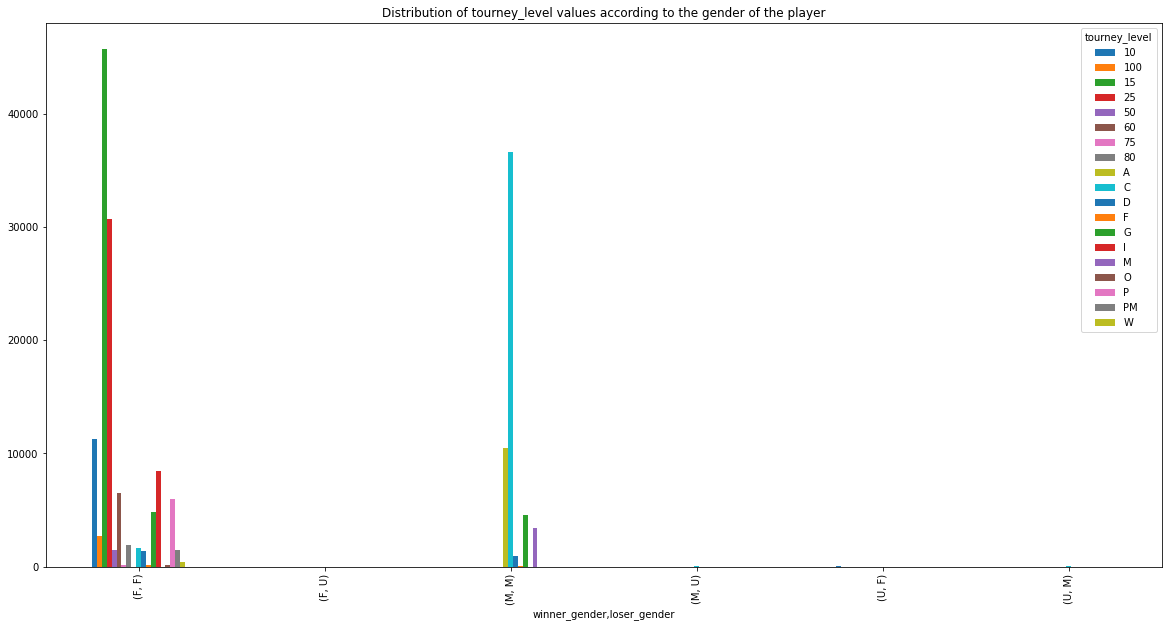

In [39]:
lf = df.groupby(['winner_gender', 'loser_gender', 'tourney_level']).size()
lf = lf.unstack()
lf.plot(
    figsize=(20, 10), 
    title="Distribution of tourney_level values according to the gender of the player", 
    #xlabel="Gender of the winner and loser player",
    #ylabel="Counting",
    kind='bar')

We see the distribution of tourney_spectators and tourney_revenue and notice that they have a quite similar behavior. we could treat usefully these data by supposing for instance, an approximation of the cost of a ticket through the division of the avg revenue with the avg number of spectators

In [40]:
df[['tourney_spectators', 'tourney_revenue']].describe()

,tourney_spectators,tourney_revenue
count,185792.00,185793.00
mean,4109.62,822840.73
std,2708.91,601272.72
min,91.00,17865.74
25%,2836.00,547366.24
50%,3340.00,663230.34
75%,4008.00,834277.81
max,18086.00,5002793.97


In [41]:
df.tourney_revenue.mean() / df.tourney_spectators.mean()

200.22290074326108

## Matches

We see more deeply on surface since has few different values. To understand which type of surfaces has been used in the matches we put it in relations the years of the tourney_date values. Thanks to the visualization of their distribution we can conclude that they follow the same increasing way instead for the last year, denoted by 2021, there is an inversion of the 'Clay' with the 'Hard' surface type.


<AxesSubplot:title={'center':'Distribution of the surface values according to the years of the tourney_date values'}>

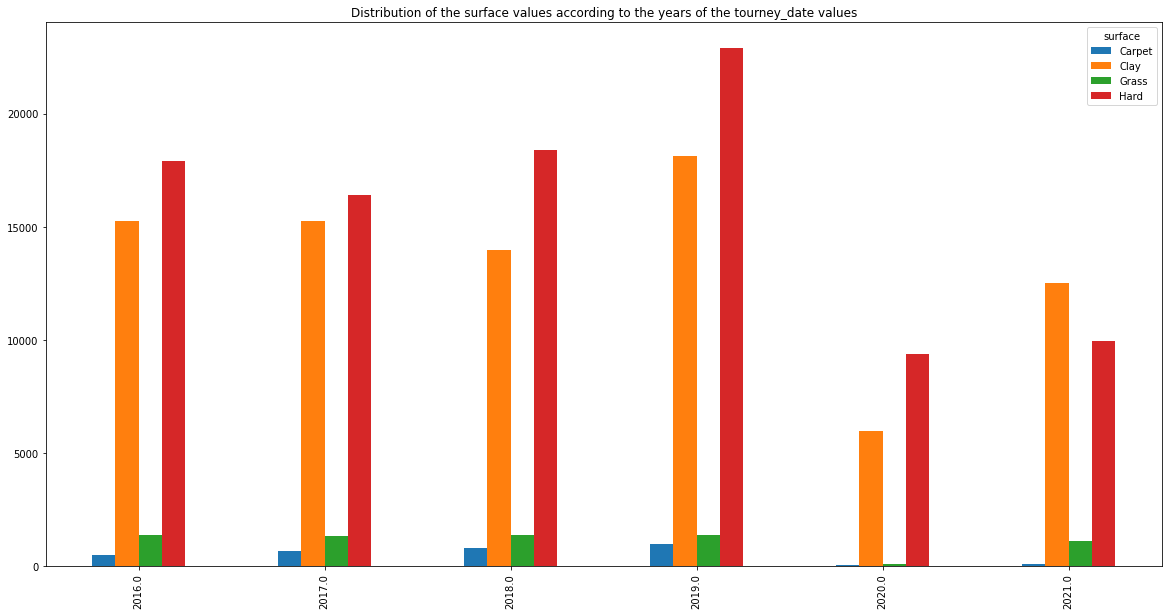

In [42]:

lf = df.groupby([ [x.year for x in df.tourney_date], 'surface']).size()
lf = lf.unstack()
lf.plot(
    figsize=(20, 10), 
    title="Distribution of the surface values according to the years of the tourney_date values", 
    kind='bar')

According to the distribution of the matches through the months and the years we can note that they follow the same structure for the first 4 years, while for the last 2 they have more missing values. In those years we can say that July was the month with more matches played.

<AxesSubplot:title={'center':'Distribution of the matches according the months of the years'}>

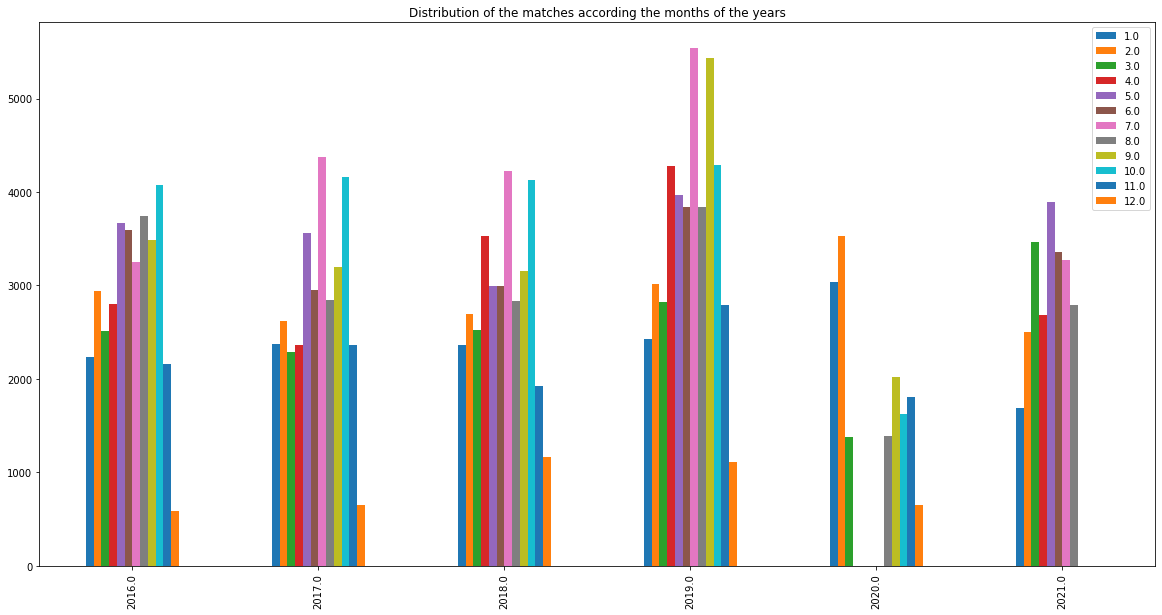

In [43]:
lf = df.groupby([ [x.year for x in df.tourney_date], [x.month for x in df.tourney_date]]).size()
lf = lf.unstack()
lf.plot(
    figsize=(20, 10), 
    title="Distribution of the matches according the months of the years", 
    kind='bar')

According to the distribution of the matches duration along the years, we note that there are a lot of matches played with less than 1 hour, 1 hour and some of 2 hours. THe bad thing is that there are also a lot of NaN values, this means that that data was not available for those matches and have to be treated in some way in the 'handling the missing values' part.

<AxesSubplot:title={'center':'Distribution of the duration of the matches during the years'}>

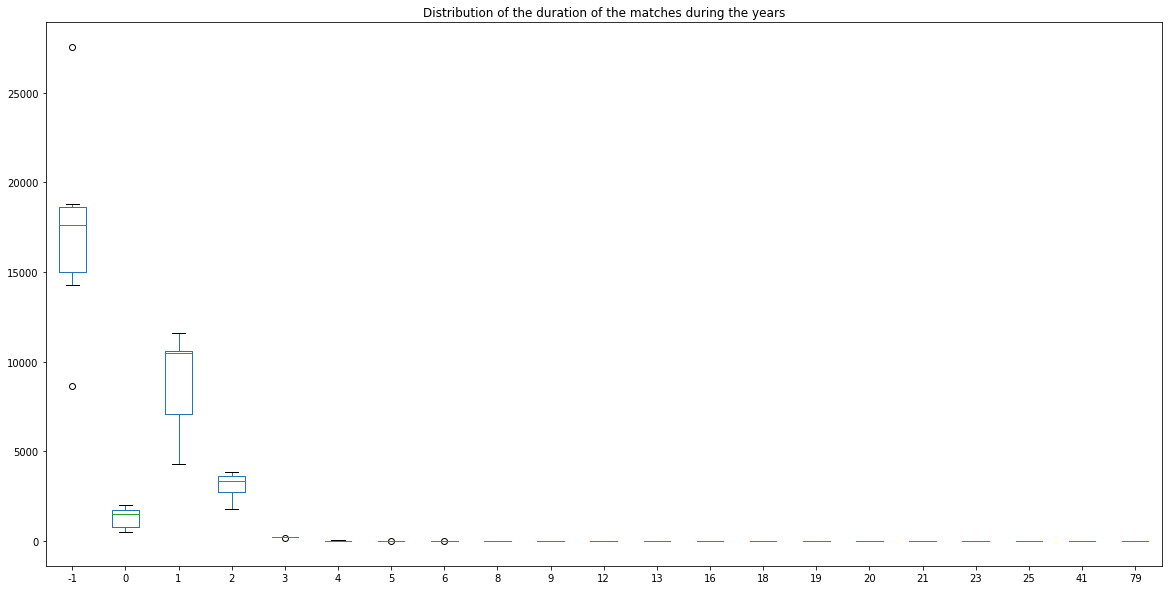

In [44]:
minutes = df['minutes']
minutes = pd.to_numeric(minutes, errors='coerce') #for removing all non-numeric values use to_numeric with parameter errors='coerce' - to replace non-numeric values to NaNs
minutes = minutes.fillna(-1)
minutes = minutes.astype(int) #Last convert values to ints:

lf = df.groupby([ [x.year for x in df.tourney_date], [ int( x // 60) for x in minutes]]).size()
lf = lf.unstack()
lf.plot(
    figsize=(20, 10), 
    title="Distribution of the duration of the matches during the years", 
    kind='box')

We note that the majority of the best_of attribute is the same for all the years, and so we could souppose for the missing values that will take the most used value too, which is the 3.

<AxesSubplot:title={'center':'Distribution of best_of matches during the years'}>

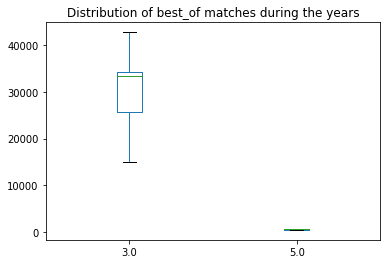

In [45]:
lf = df.groupby([ [x.year for x in df.tourney_date], 'best_of']).size()
lf = lf.unstack()
lf.plot(
    title="Distribution of best_of matches during the years", 
    kind='box')

We see that there are some previous consideration then this means that there are same countries that are never qualified between the winners Moreover, by seeing their distribution graph we note they are similar.

<AxesSubplot:title={'center':'Distribution of winner_ioc'}, xlabel='winner_ioc'>

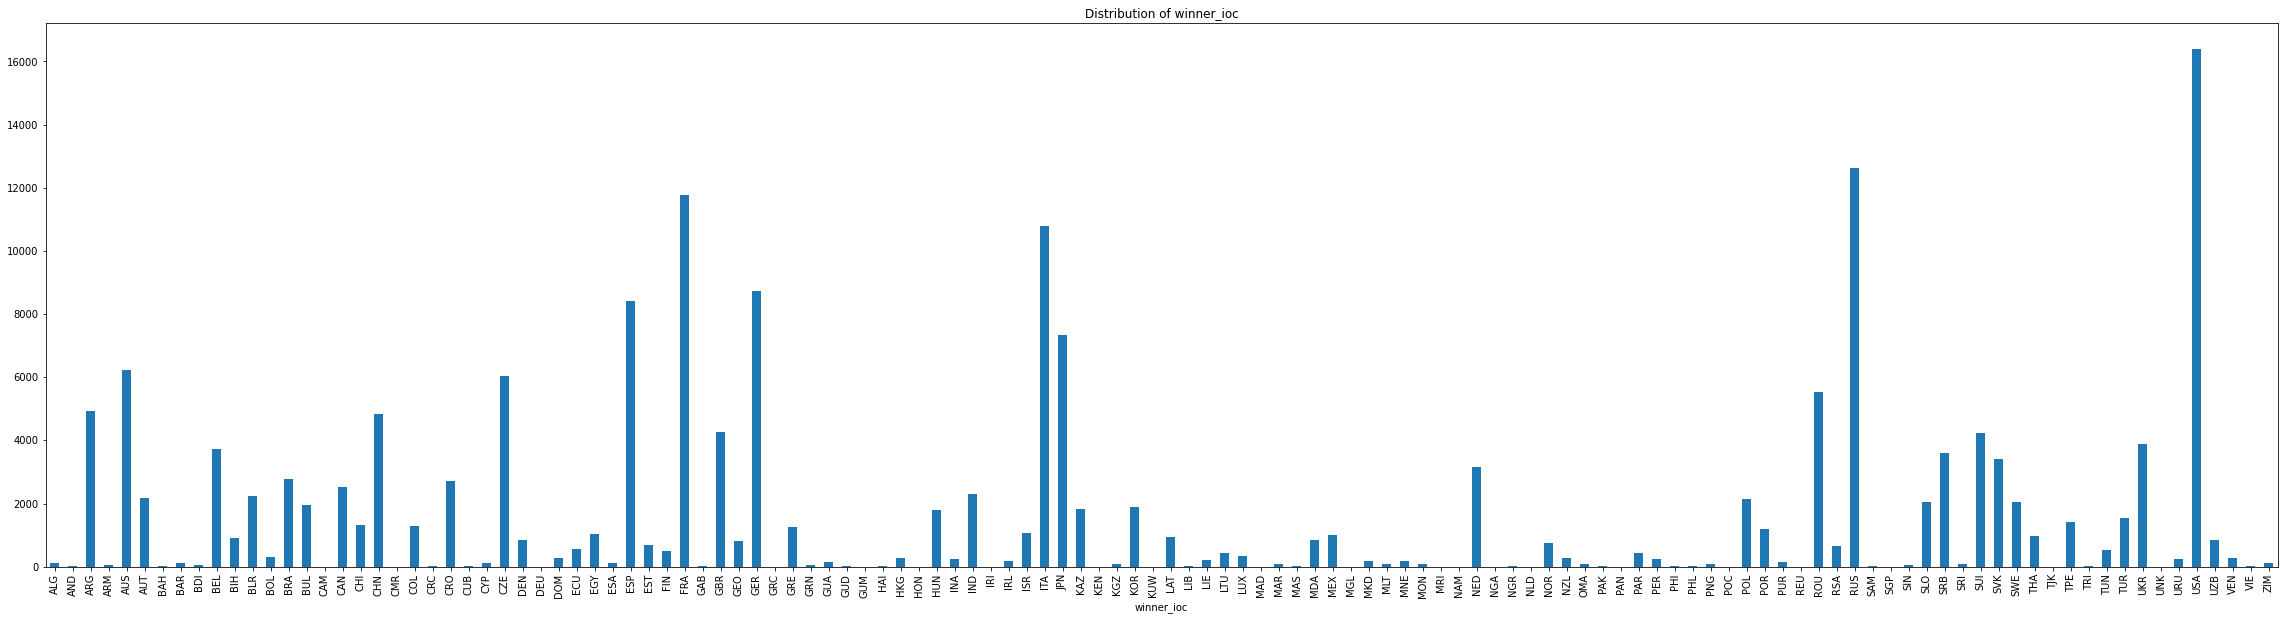

In [46]:
lf = df.groupby([ df.winner_ioc]).size()
lf.plot(
    figsize=(40, 10), 
    title="Distribution of winner_ioc", 
    kind='bar')

<AxesSubplot:title={'center':'Distribution of loser_ioc'}, xlabel='loser_ioc'>

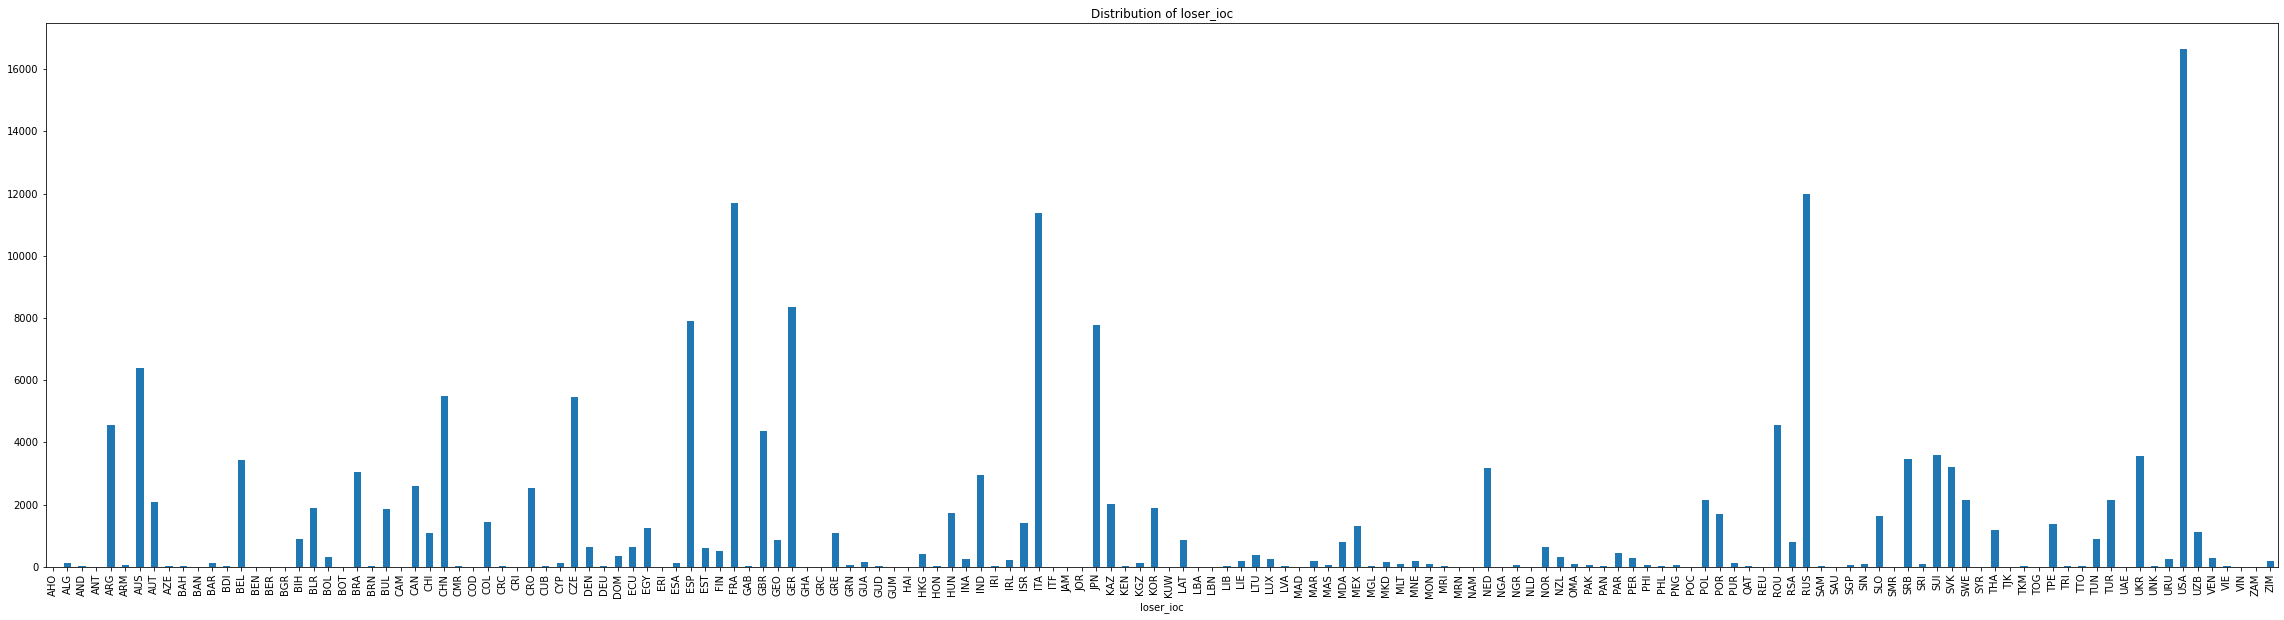

In [47]:
lf = df.groupby([ df.loser_ioc]).size()
lf.plot(
    figsize=(40, 10), 
    title="Distribution of loser_ioc", 
    kind='bar')

We expected that the following attributes behave in the same way, they have 3 different values. Moreover, by their distribution graph we note that the majority of the players user the R hand, both the men and women players.

<AxesSubplot:title={'center':'Distribution of the hand used on matches and their gender'}, xlabel='winner_hand,loser_hand,winner_gender'>

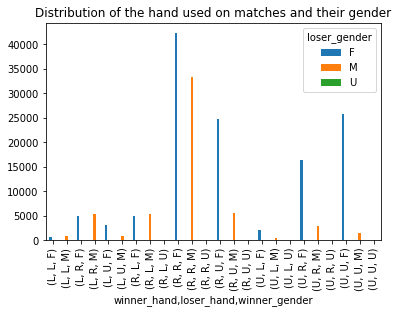

In [48]:
lf = df.groupby([ 'winner_hand', 'loser_hand', 'winner_gender', 'loser_gender']).size()
lf = lf.unstack()
lf.plot(
    title="Distribution of the hand used on matches and their gender", 
    kind='bar')

By visualizing the distribution of winner_entry/loser_entry we note that some are present only with the losers and vice versa, some are present only with the winners. 
NOTA ?: There is some relation with the ranking of the player to discover

<AxesSubplot:title={'center':'Distribution of winner_entry'}, xlabel='winner_entry'>

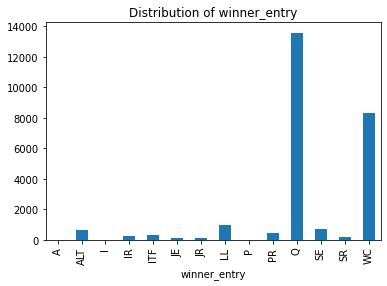

In [49]:
lf = df.groupby([ 'winner_entry']).size()
lf.plot(
    title="Distribution of winner_entry",
    kind='bar')

<AxesSubplot:title={'center':'Distribution of loser_entry'}, xlabel='loser_entry'>

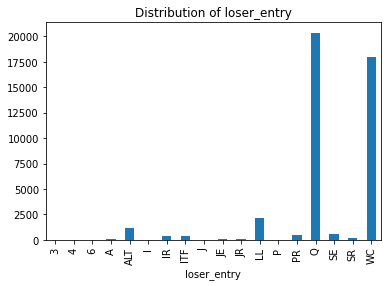

In [50]:
rf = df.groupby([ 'loser_entry']).size()
rf.plot(
    title="Distribution of loser_entry",
    kind='bar')

### Players

We represent different attributes by grouping them according to the relation of similarity of their meaning. So for instance, some that are specific of a player and some other that are specific of how a match was valued. They have to be treated again later with considerations specific of the preparation data phase.

In [51]:
df[['winner_id', 'loser_id', 'winner_ht', 'loser_ht', 'winner_age', 'loser_age', 'winner_rank', 'loser_rank', 'winner_rank_points', 'loser_rank_points']].describe()

,winner_id,loser_id,winner_ht,loser_ht,winner_age,loser_age,winner_rank,loser_rank,winner_rank_points,loser_rank_points
count,185764.00,185791.00,49303.00,38330.00,182966.00,179282.00,166417.00,150560.00,166399.00,150543.00
mean,180105.89,181617.54,181.41,181.57,23.46,23.27,383.93,434.28,470.94,356.74
std,46571.82,46643.29,11.63,10.82,4.47,4.64,314.19,355.96,1041.88,703.21
min,100644.00,100644.00,2.00,2.00,14.00,14.00,1.00,1.00,1.00,1.00
25%,122330.00,124079.00,175.00,175.00,20.00,20.00,137.00,156.00,49.00,35.00
50%,203526.00,205815.00,183.00,183.00,23.00,23.00,298.00,325.00,161.00,138.00
75%,214152.00,214818.00,188.00,188.00,26.00,26.00,562.00,642.00,439.00,378.00
max,245099.00,245099.00,211.00,211.00,95.00,74.00,2220.00,2257.00,16950.00,16950.00


In [52]:
df[['w_svpt', 'l_svpt', 'w_1stIn', 'l_1stIn', 'w_1stWon', 'l_1stWon', 'w_2ndWon', 'l_2ndWon', 'w_SvGms', 'l_SvGms', 'w_bpSaved', 'l_bpSaved', 'w_bpFaced', 'l_bpFaced', 'w_ace', 'l_ace', 'w_df', 'l_df']].describe()

,w_svpt,l_svpt,w_1stIn,l_1stIn,w_1stWon,l_1stWon,w_2ndWon,l_2ndWon,w_SvGms,l_SvGms,w_bpSaved,l_bpSaved,w_bpFaced,l_bpFaced,w_ace,l_ace,w_df,l_df
count,82008.00,82013.00,82008.00,82002.00,82010.00,82009.00,82007.00,82010.00,82009.00,82016.00,82013.00,82009.00,82010.00,82004.00,82008.00,82011.00,82010.00,82017.00
mean,71.30,73.57,44.27,44.57,32.14,28.05,14.46,12.72,11.12,10.94,3.54,4.66,5.40,8.86,4.82,3.54,2.86,3.61
std,25.53,24.99,16.95,16.78,11.41,12.27,5.94,6.32,3.51,3.50,3.11,3.15,4.20,3.97,4.39,3.83,2.42,2.61
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,53.00,56.00,33.00,33.00,24.00,19.00,10.00,8.00,9.00,9.00,1.00,2.00,2.00,6.00,2.00,1.00,1.00,2.00
50%,67.00,69.00,42.00,42.00,30.00,26.00,14.00,12.00,10.00,10.00,3.00,4.00,5.00,8.00,4.00,2.00,2.00,3.00
75%,87.00,88.00,54.00,54.00,38.00,35.00,18.00,16.00,14.00,13.00,5.00,6.00,8.00,11.00,7.00,5.00,4.00,5.00
max,1957.00,1672.00,1330.00,893.00,836.00,532.00,304.00,399.00,49.00,50.00,209.00,120.00,266.00,190.00,75.00,67.00,114.00,114.00


## Data Correlation
We compute the correlation matrix related to the numerical attributes of the dataset.

In [53]:
matrix = df.corr() #use pearson
matrix

,draw_size,match_num,winner_id,winner_ht,winner_age,loser_id,loser_ht,loser_age,best_of,minutes,...,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,tourney_spectators,tourney_revenue
draw_size,1.00,0.27,-0.21,0.02,0.20,-0.22,-0.01,0.21,0.38,0.12,...,0.09,0.08,0.07,0.09,-0.32,0.33,-0.32,0.28,0.93,0.84
match_num,0.27,1.00,-0.29,0.07,0.16,-0.29,0.05,0.18,0.03,0.00,...,-0.00,-0.00,0.00,0.00,-0.21,0.13,-0.19,0.13,0.27,0.18
winner_id,-0.21,-0.29,1.00,-0.50,-0.50,0.90,-0.54,-0.35,-0.20,-0.03,...,-0.16,-0.13,0.05,0.17,0.38,-0.17,0.29,-0.13,-0.20,-0.18
winner_ht,0.02,0.07,-0.50,1.00,0.12,-0.51,0.41,0.13,0.13,0.04,...,0.17,0.14,-0.06,-0.18,-0.05,0.03,-0.03,0.00,0.02,0.02
winner_age,0.20,0.16,-0.50,0.12,1.00,-0.36,0.13,0.23,0.12,0.04,...,0.05,0.05,0.01,-0.01,-0.39,0.25,-0.29,0.19,0.19,0.17
loser_id,-0.22,-0.29,0.90,-0.51,-0.36,1.00,-0.53,-0.50,-0.20,-0.05,...,-0.17,-0.14,0.05,0.17,0.37,-0.17,0.35,-0.15,-0.20,-0.19
loser_ht,-0.01,0.05,-0.54,0.41,0.13,-0.53,1.00,0.11,0.13,0.06,...,0.16,0.16,-0.05,-0.17,-0.01,0.00,0.00,-0.02,-0.01,-0.00
loser_age,0.21,0.18,-0.35,0.13,0.23,-0.50,0.11,1.00,0.11,0.06,...,0.04,0.06,0.00,-0.03,-0.34,0.21,-0.39,0.24,0.19,0.18
best_of,0.38,0.03,-0.20,0.13,0.12,-0.20,0.13,0.11,1.00,0.27,...,0.26,0.38,0.14,0.16,-0.14,0.25,-0.13,0.16,0.34,0.33
minutes,0.12,0.00,-0.03,0.04,0.04,-0.05,0.06,0.06,0.27,1.00,...,0.58,0.71,0.33,0.32,-0.08,0.06,-0.13,0.11,0.12,0.10


To visualize in a better way the correlation between numerical attributes we use heatmap. Cell's colors represent intensity of correlection between two attributes.

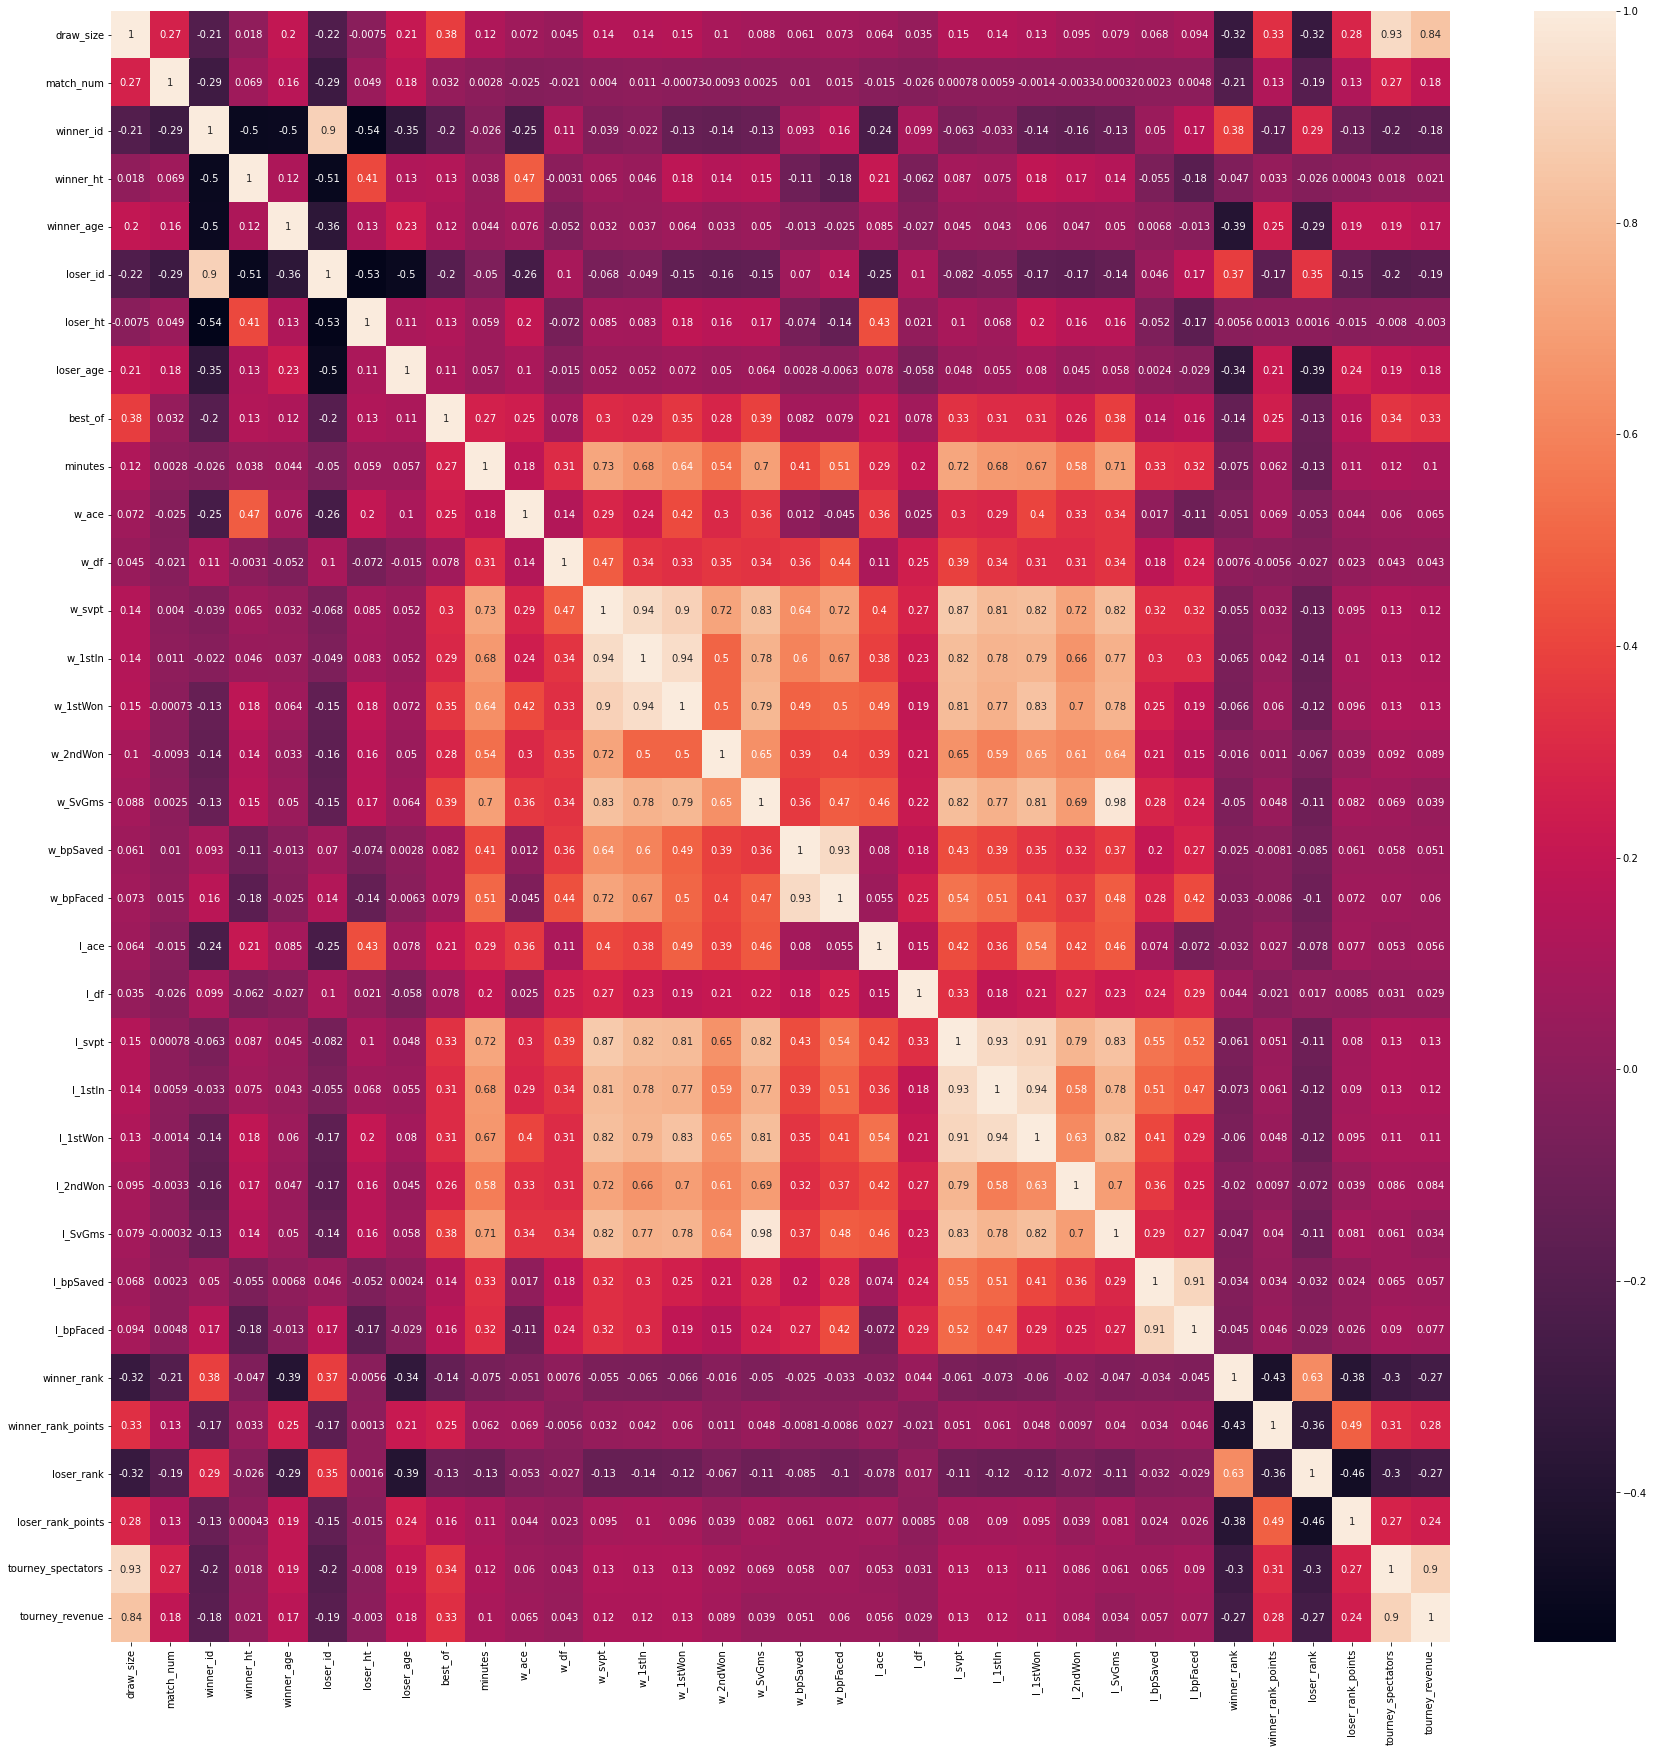

In [54]:
fig, ax = plt.subplots(figsize=(30, 30))         # Sample figsize in inches
sn.heatmap(matrix, annot=True)
plt.show()

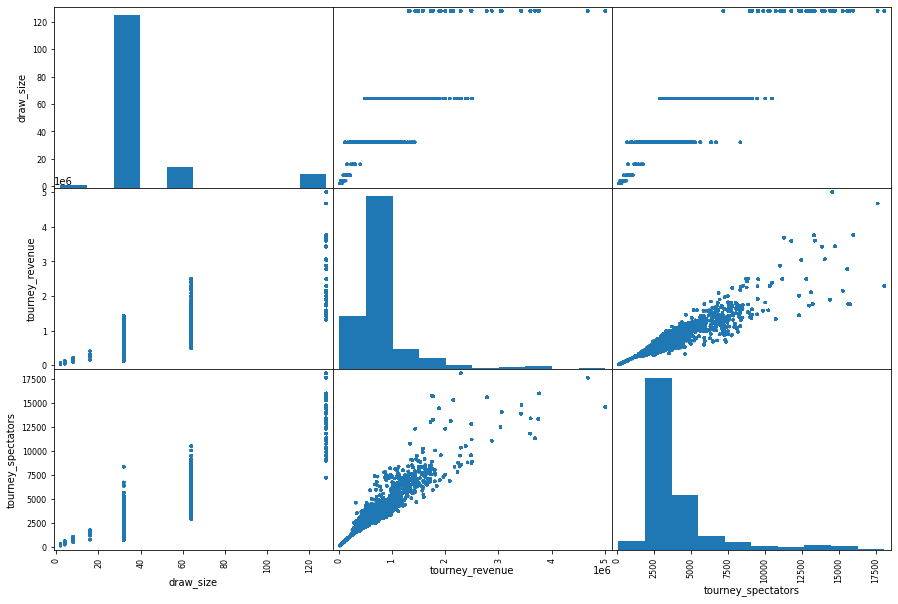

In [55]:
pd.plotting.scatter_matrix(df[['draw_size', 'tourney_revenue', 'tourney_spectators']], figsize = (15, 10))
plt.show()

In [56]:
def scatter_subplots(cell, x, y, x_label, y_label):
    cell.scatter(x, y)
    cell.set_title('Corr(' + x_label + ',' + y_label +'): ' + str(x.corr(y)))
    cell.set_xlabel(x_label)
    cell.set_ylabel(y_label)


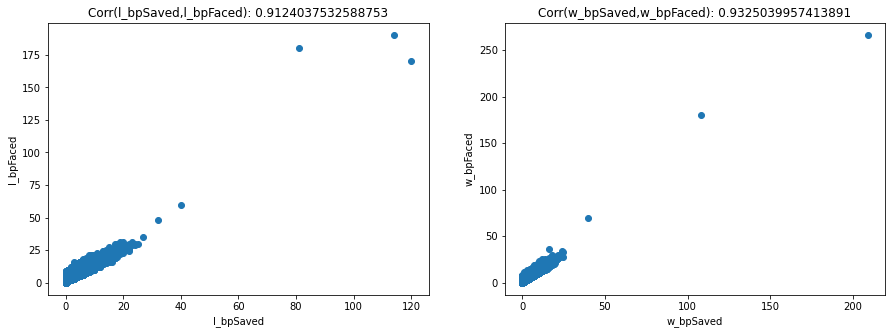

In [57]:
f, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(15,5))
scatter_subplots(axs[0], df.l_bpSaved, df.l_bpFaced, 'l_bpSaved', 'l_bpFaced')
scatter_subplots(axs[1], df.w_bpSaved, df.w_bpFaced, 'w_bpSaved', 'w_bpFaced')

Corr( l_svpt, l_1stIn) = 0.9319198242617066 
Corr( l_svpt, l_1stWon) = 0.9106908893989655 
Corr(l_1stIn, l_1stWon) = 0.9359395228832278 
Corr(l_SvGms, l_1stIn) = 0.7840426499908709 
Corr(l_SvGms, l_svpt) = 0.8138969451454275 
Corr(l_SvGms, l_1stWon) = 0.8245728286088524


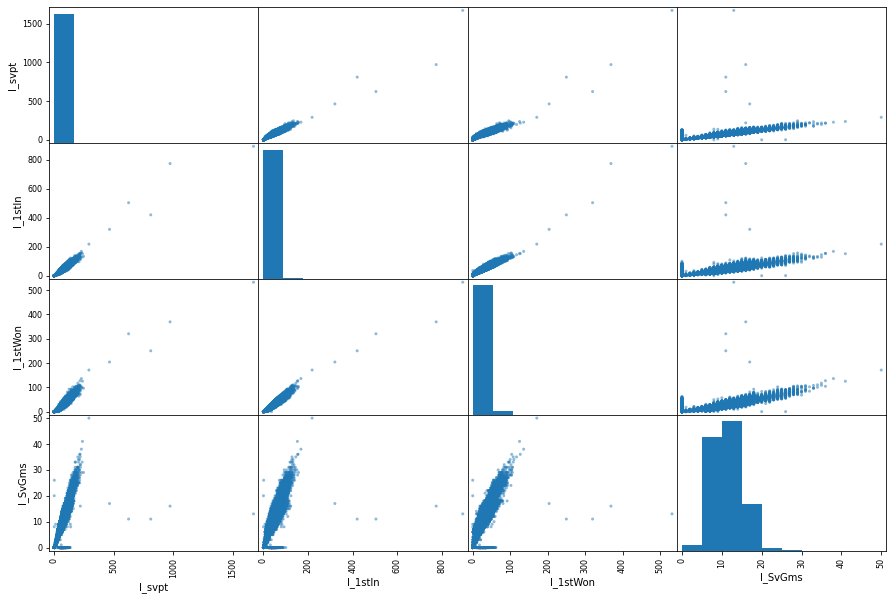

In [58]:
pd.plotting.scatter_matrix(df[['l_svpt', 'l_1stIn', 'l_1stWon', 'l_SvGms']], figsize = (15, 10))
print("Corr( l_svpt, l_1stIn) =", df.l_svpt.corr(df.l_1stIn), "\nCorr( l_svpt, l_1stWon) =", df.l_svpt.corr(df.l_1stWon), "\nCorr(l_1stIn, l_1stWon) =", df.l_1stIn.corr(df.l_1stWon),
     "\nCorr(l_SvGms, l_1stIn) =", df.l_SvGms.corr(df.l_1stIn),  "\nCorr(l_SvGms, l_svpt) =", df.w_SvGms.corr(df.l_1stWon), "\nCorr(l_SvGms, l_1stWon) =", df.l_SvGms.corr(df.l_1stWon),)
plt.show()

Corr( w_svpt, w_1stIn) = 0.9387942855567127 
Corr( w_svpt, w_1stWon) = 0.8958797627131595 
Corr(w_1stIn, w_1stWon) = 0.9428741040281652 
Corr(w_SvGms, w_1stIn) = 0.7763928732191774 
Corr(w_SvGms, w_svpt) = 0.7945277700671568 
Corr(w_SvGms, w_1stWon) = 0.7945277700671568


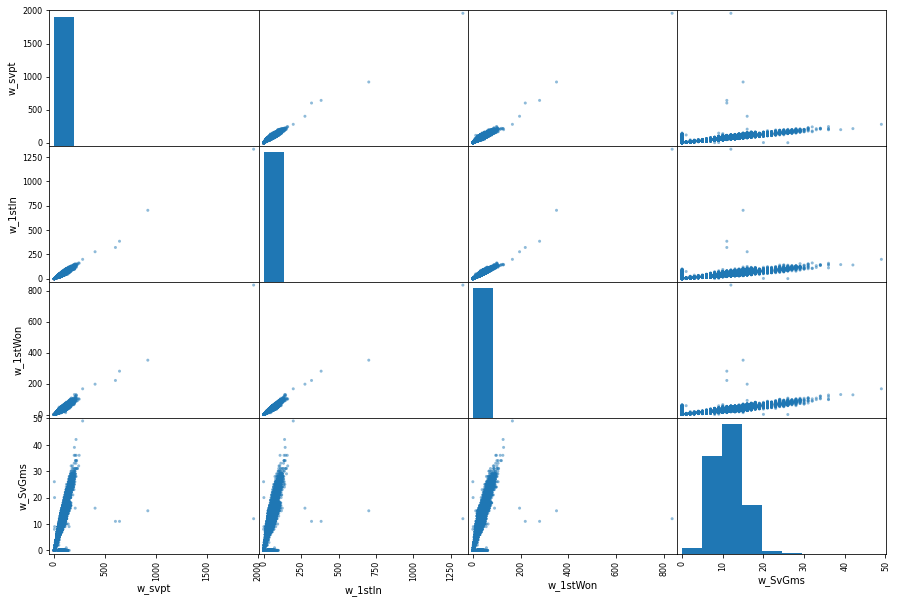

In [59]:
pd.plotting.scatter_matrix(df[['w_svpt', 'w_1stIn', 'w_1stWon', 'w_SvGms']], figsize = (15, 10))
print("Corr( w_svpt, w_1stIn) =", df.w_svpt.corr(df.w_1stIn), "\nCorr( w_svpt, w_1stWon) =", df.w_svpt.corr(df.w_1stWon), "\nCorr(w_1stIn, w_1stWon) =", df.w_1stIn.corr(df.w_1stWon),
     "\nCorr(w_SvGms, w_1stIn) =", df.w_SvGms.corr(df.w_1stIn),  "\nCorr(w_SvGms, w_svpt) =", df.w_SvGms.corr(df.w_1stWon), "\nCorr(w_SvGms, w_1stWon) =", df.w_SvGms.corr(df.w_1stWon))
plt.show()


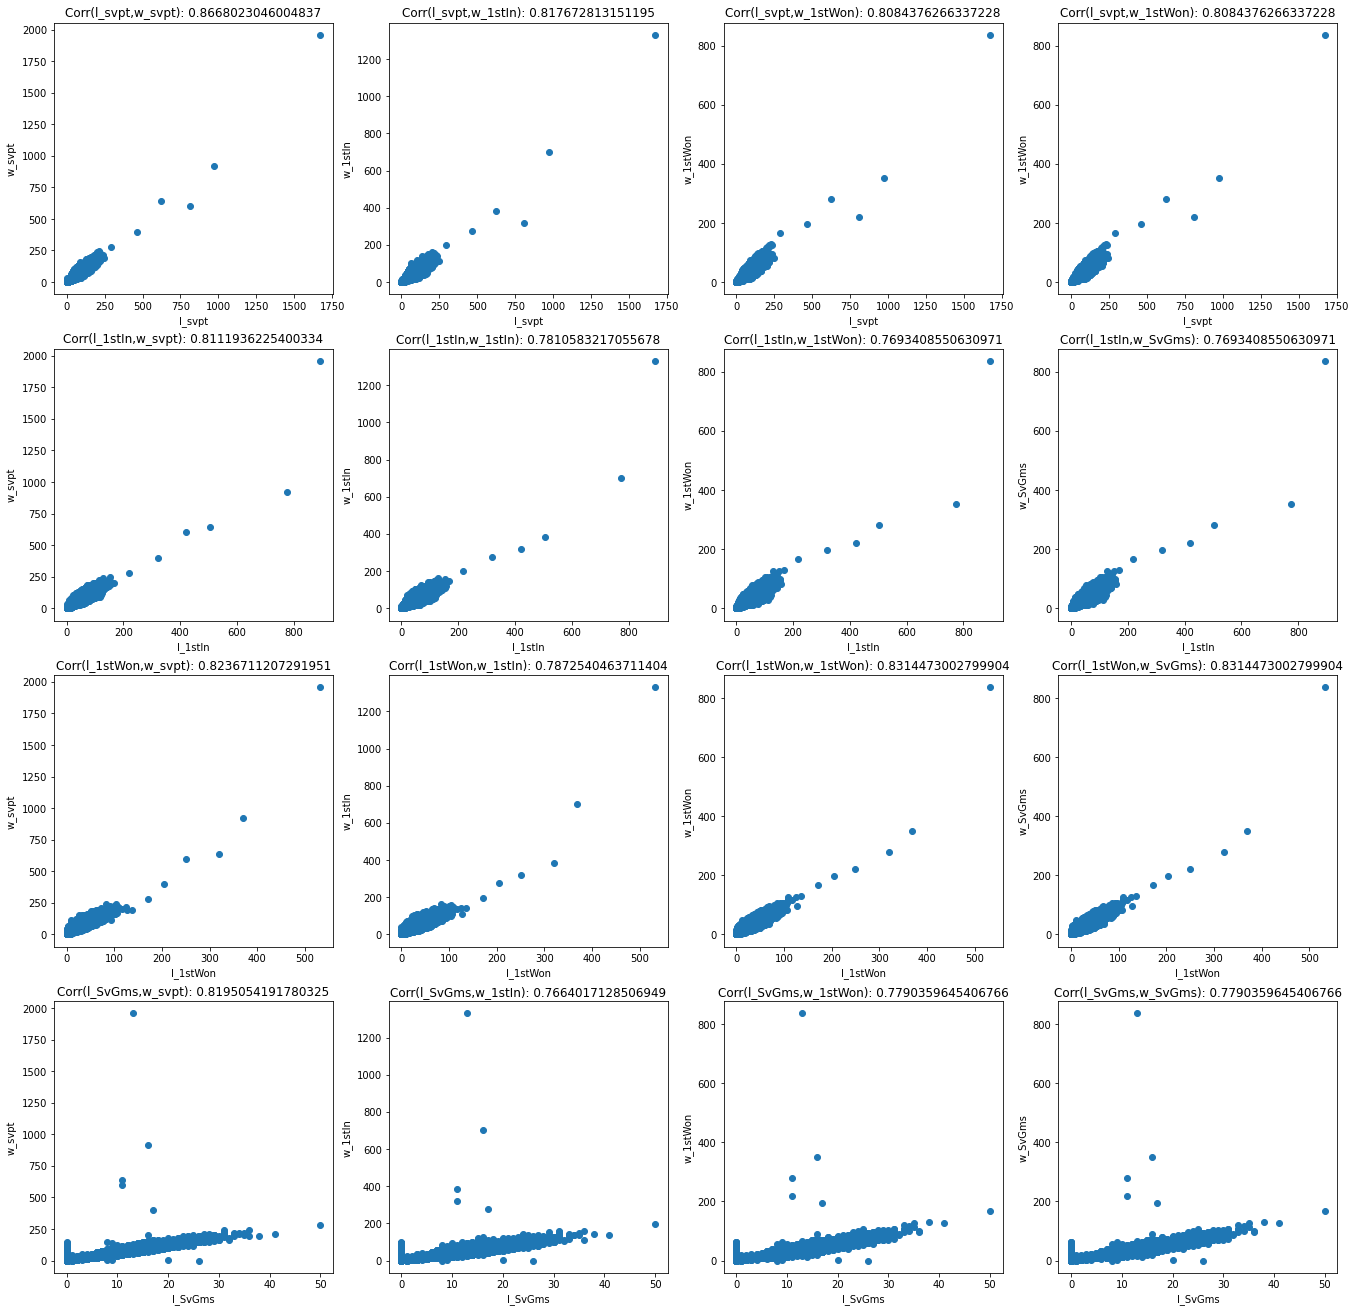

In [60]:
f, axs = plt.subplots(nrows = 4, ncols = 4, figsize=(23,23))
scatter_subplots(axs[0][0], df.l_svpt, df.w_svpt, 'l_svpt', 'w_svpt')
scatter_subplots(axs[0][1], df.l_svpt, df.w_1stIn, 'l_svpt', 'w_1stIn')
scatter_subplots(axs[0][2], df.l_svpt, df.w_1stWon, 'l_svpt', 'w_1stWon')
scatter_subplots(axs[0][3], df.l_svpt, df.w_1stWon, 'l_svpt', 'w_1stWon')

scatter_subplots(axs[1][0], df.l_1stIn, df.w_svpt, 'l_1stIn', 'w_svpt')
scatter_subplots(axs[1][1], df.l_1stIn, df.w_1stIn, 'l_1stIn', 'w_1stIn')
scatter_subplots(axs[1][2], df.l_1stIn, df.w_1stWon, 'l_1stIn', 'w_1stWon')
scatter_subplots(axs[1][3], df.l_1stIn, df.w_1stWon, 'l_1stIn', 'w_SvGms')


scatter_subplots(axs[2][0], df.l_1stWon, df.w_svpt, 'l_1stWon', 'w_svpt')
scatter_subplots(axs[2][1], df.l_1stWon, df.w_1stIn, 'l_1stWon', 'w_1stIn')
scatter_subplots(axs[2][2], df.l_1stWon, df.w_1stWon, 'l_1stWon', 'w_1stWon')
scatter_subplots(axs[2][3], df.l_1stWon, df.w_1stWon, 'l_1stWon', 'w_SvGms')

scatter_subplots(axs[3][0], df.l_SvGms, df.w_svpt, 'l_SvGms', 'w_svpt')
scatter_subplots(axs[3][1], df.l_SvGms, df.w_1stIn, 'l_SvGms', 'w_1stIn')
scatter_subplots(axs[3][2], df.l_SvGms, df.w_1stWon, 'l_SvGms', 'w_1stWon')
scatter_subplots(axs[3][3], df.l_SvGms, df.w_1stWon, 'l_SvGms', 'w_SvGms')

plt.show()

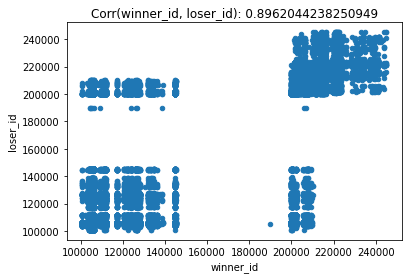

In [61]:
plot = df.plot.scatter(x = 'winner_id', y = 'loser_id')
plot.set_title('Corr(winner_id, loser_id): ' + str(df.winner_id.corr(df.loser_id)))
plt.show()

# Export into CSV files

In [62]:
df.to_csv('dataset/matches_understanding.csv')